<a href="https://colab.research.google.com/github/YBilodeau/Sales-Predictions/blob/main/Sales_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sales Prediction Project**
- Yvon Bilodeau
- February 2022



---



The project is a sales prediction for food items sold at various stores. The goal of this project is to help the retailer better understand the properties of products and outlets that play crucial roles in increasing sales.

**Data Dictionary for this dataset**


|**Variable Name**|	**Description**|
| ----- | ----- |
|Item_Identifier|	Unique product ID|
|Item_Weight|	Weight of product|
|Item_Fat_Content|	Whether the product is low fat or regular|
|Item_Visibility|	The percentage of total display area of all products in a store allocated to the particular product|
|Item_Type|	The category to which the product belongs|
|Item_MRP|	Maximum Retail Price (list price) of the product|
|Outlet_Identifier|	Unique store ID|
|Outlet_Establishment_Year|	The year in which store was established|
|Outlet_Size|	The size of the store in terms of ground area covered|
|Outlet_Location_Type|	The type of area in which the store is located|
|Outlet_Type|	Whether the outlet is a grocery store or some sort of supermarket|
|Item_Outlet_Sales|	Sales of the product in the particular store. This is the target variable to be predicted.|

## **Mount Data | Import Libraries | Load the Dataset**

### **Mount Google Drive**

In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Import Libraries**

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

### **Load the Dataset**

- Data downloaded from [link](https://drive.google.com/file/d/1syH81TVrbBsdymLT_jl2JIf6IjPXtSQw/view). This was the [Original data source](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/).

In [143]:
filename = "/content/drive/MyDrive/Colab Notebooks/CodingDojo/000 Data Files/sales_predictions.csv"
df = pd.read_csv(filename)

## **Inspect the Data**

### Display Rows and Column Count

In [144]:
# The .shape attribute returns a tuple of length 2, representing the dimensionality of the DataFrame.  
# The number of rows and columns of the DataFrame.
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 8523 rows, and 12 columns.
The rows represent 8523 observations, and the columns represent 11 features and 1 target variable.


### Display Data Types

In [145]:
# The .dtype attribute returns a Series with the data type of each column.
# Columns with mixed types are stored with the object dtype.
df.dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- The dataset has a combination of categorical (object) and numeric (float and int) data types.
- No mismatched data types were found.


### Display Column Names, Count of Non-Null Values, and Data Types

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Display First (5) Rows

In [147]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- Data appears to have loaded correctly.

## **Clean the Data**

### **Remove Duplicates**

In [148]:
df.duplicated().sum()

0

In [149]:
df.drop_duplicates(keep='first', inplace=True)
df.shape

(8523, 12)

- No duplicates were found to be dropped.

### **Missing Values**

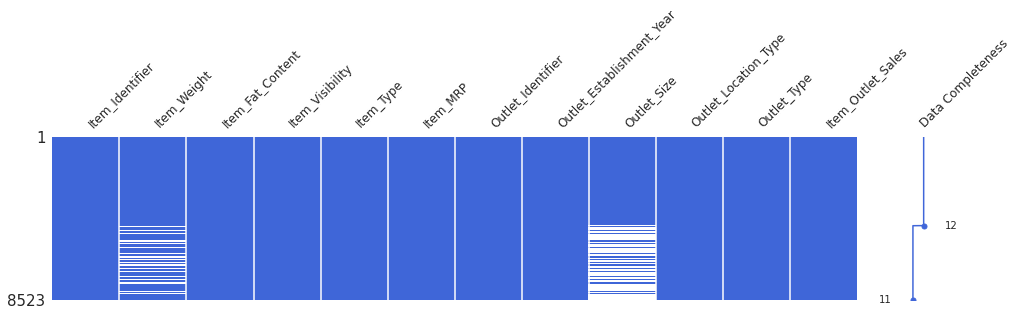

In [150]:
import missingno as msno
msno.matrix(df, figsize=(16,3), labels=True, fontsize=12, sort="descending", color=	(.25,.4,.85));

In [151]:
print(df.isna().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


- 'Item_Weight' and 'Outlet Size' columns both have missing values.

#### 'Item Weight' column
- 'Item_Weight' has 1643 missing values. 
- All identical 'Item_Identifier's should have the same 'Item_Weight'.

In [152]:
# Loop through index values of the dataframe
for ind in df.index:
    # Create a filter to select the Item_Identifier corresponding to the index
    item_filter = df['Item_Identifier'] == df.loc[ind,'Item_Identifier']

    # Calculate the rounded value of the mean 'Item_Weight' of this rows 'Item_Identifier' 
    mean_item_weight = round(df.loc[item_filter,'Item_Weight'].mean(), 3)

    # Assign mean_item_weight to the 'Item_Weight' column of this row
    df.loc[ind,'Item_Weight'] = mean_item_weight
    
    #print(ind, df['Item_Identifier'][ind], df['Item_Weight'][ind], item_weight, "\n")

In [153]:
# Identify any remaining 'Item_Identifier's without 'Item_Weight'
print(df.Item_Weight.isnull().sum())
df[df.Item_Weight.isnull()]

4


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


- The remaining (4) values can be imputed using SimpleImputer(strategy='median').

#### 'Outlet_Size' column
- 'Outlet_Size' has 2410 missing values out of 8523 rows, which is significant (28%).

In [154]:
print(df['Outlet_Size'].unique())

['Medium' nan 'High' 'Small']


In [155]:
df.groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Size'].unique()

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 1                          [Small]
                   Tier 3                            [nan]
Supermarket Type1  Tier 1                  [Medium, Small]
                   Tier 2                     [nan, Small]
                   Tier 3                           [High]
Supermarket Type2  Tier 3                         [Medium]
Supermarket Type3  Tier 3                         [Medium]
Name: Outlet_Size, dtype: object

- Unable to impute 'Outlet_Size' from 'Outlet_Type' and/or 'Outlet_Location_Type'.
- Missing values will be replaced with 'Unknown' for this Object Data Type.

In [156]:
df.Outlet_Size.fillna('Unknown',inplace=True)

In [157]:
print(df['Outlet_Size'].unique())

['Medium' 'Unknown' 'High' 'Small']


### **Inspect Columns with Object Datatypes**

Check for common syntax errors which may include extra white spaces at the beginning or end of strings or column names.

Check for typos or inconsistencies in strings that need to be fixed.

In [158]:
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [159]:
df.describe(exclude="number")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,5,16,10,4,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [160]:
# Create a series of the datatypes
data_types = df.dtypes
# Create a filter to select only the object datatypes
object_data_types = data_types[(data_types == "object")]
# Display the series of object datatypes
object_data_types

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

**'Item_Fat_Content' column**

In [161]:
print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [162]:
df.groupby(['Item_Fat_Content'])['Item_Fat_Content'].count()

Item_Fat_Content
LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
Name: Item_Fat_Content, dtype: int64

- Replace 'low fat' and 'LF' with 'Low Fat'.
- Replace 'reg' with 'Regular'.

In [163]:
# Define a dictionary with key/value pairs and use it to replace values
dict = {"low fat": 'Low Fat', "reg": 'Regular', "LF": 'Low Fat'}
df.replace({'Item_Fat_Content': dict}, inplace = True)

In [164]:
print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


- Replacement values confirmed.

**'Item_Type' column**

In [165]:
print(df['Item_Type'].unique())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


In [166]:
df.groupby(['Item_Type'])['Item_Type'].count()

Item_Type
Baking Goods              648
Breads                    251
Breakfast                 110
Canned                    649
Dairy                     682
Frozen Foods              856
Fruits and Vegetables    1232
Hard Drinks               214
Health and Hygiene        520
Household                 910
Meat                      425
Others                    169
Seafood                    64
Snack Foods              1200
Soft Drinks               445
Starchy Foods             148
Name: Item_Type, dtype: int64

- No issues noted.

**'Outlet_Identifier' column**

In [167]:
print(df['Outlet_Identifier'].unique())

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


In [168]:
df.groupby(['Outlet_Identifier'])['Outlet_Identifier'].count()

Outlet_Identifier
OUT010    555
OUT013    932
OUT017    926
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045    929
OUT046    930
OUT049    930
Name: Outlet_Identifier, dtype: int64

- No issues noted.

**'Outlet_Establishment_Year' column**

In [169]:
print(df['Outlet_Establishment_Year'].unique())

[1999 2009 1998 1987 1985 2002 2007 1997 2004]


In [170]:
df.groupby(['Outlet_Establishment_Year'])['Outlet_Establishment_Year'].count()

Outlet_Establishment_Year
1985    1463
1987     932
1997     930
1998     555
1999     930
2002     929
2004     930
2007     926
2009     928
Name: Outlet_Establishment_Year, dtype: int64

- No issues noted.

**'Outlet_Size' column**

In [171]:
print(df['Outlet_Size'].unique())

['Medium' 'Unknown' 'High' 'Small']


In [172]:
df.groupby(['Outlet_Size'])['Outlet_Size'].count()

Outlet_Size
High        932
Medium     2793
Small      2388
Unknown    2410
Name: Outlet_Size, dtype: int64

- No issues noted.

**'Outlet_Location_Type' column**

In [173]:
print(df['Outlet_Location_Type'].unique())

['Tier 1' 'Tier 3' 'Tier 2']


In [174]:
df.groupby(['Outlet_Location_Type'])['Outlet_Location_Type'].count()

Outlet_Location_Type
Tier 1    2388
Tier 2    2785
Tier 3    3350
Name: Outlet_Location_Type, dtype: int64

- No issues noted.

**'Outlet_Type' column**

In [175]:
print(df['Outlet_Type'].unique())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [176]:
df.groupby(['Outlet_Type'])['Outlet_Type'].count()

Outlet_Type
Grocery Store        1083
Supermarket Type1    5577
Supermarket Type2     928
Supermarket Type3     935
Name: Outlet_Type, dtype: int64

- No issues noted.

### **Inspect Columns with Numerical Datatypes**

- Filter columns with numerical indexes.

In [177]:
# Summary statistics for Numeric Columns
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875420,0.066132,140.992782,1997.831867,2181.288914
std,4.646098,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


- **'Item_Weight'** -
No unusual statistics were noted.
- **'Item_Visibility'** - 
The percentage of total display area of all products in a store allocated to the particular product appears to have an extreme range. (Minimum value of 0.000000 and a Maximum value of 0.328391)
- **'Item_MRP'** -
No unusual statistics were noted.
- **'Outlet_Establishment_Year'** -
No unusual statistics were noted.
- **'Item_Outlet_Sales'** -
No unusual statistics were noted.


## **Exploratory Data Analysis**

### **Numeric Columns**

In [178]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875420,0.066132,140.992782,1997.831867,2181.288914
std,4.646098,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


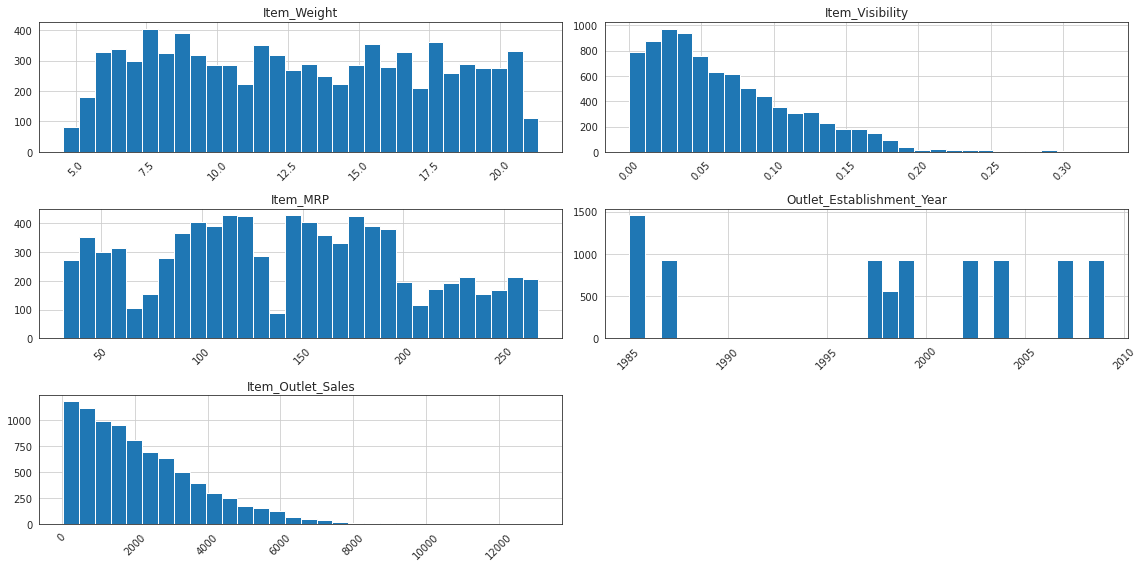

In [179]:
df.hist(figsize=(16,8), xrot=45, bins=30)
plt.tight_layout()
plt.show;

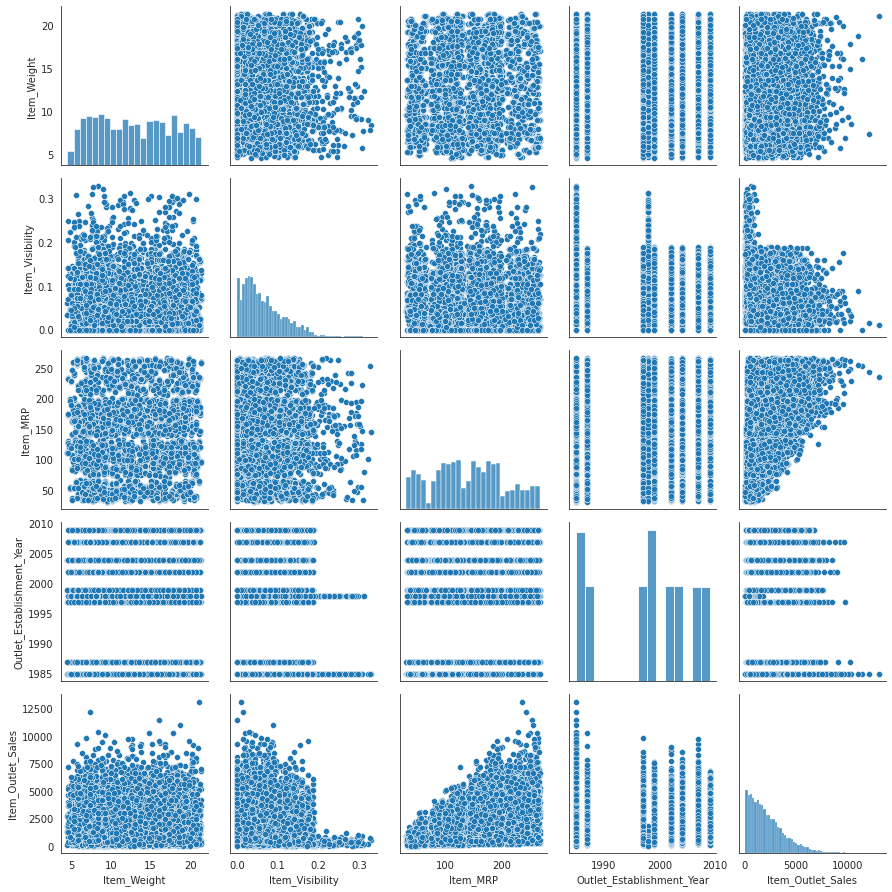

In [180]:
sns.pairplot(df);
plt.tight_layout()
plt.show;

### **Categorical Columns**

In [181]:
df.describe(exclude=('number'))

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,2,16,10,4,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5517,1232,935,2793,3350,5577


## **Explanatory Data Analysis**

### **Numeric Columns**

#### **Item Weight**

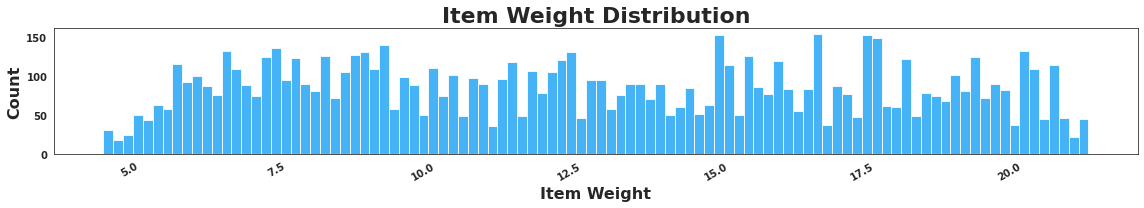

In [182]:
plt.figure(figsize = (16,3))

sns.histplot(data=df, x='Item_Weight', color='#069AF3', bins=100); 

plt.title('Item Weight Distribution', fontsize = 22, weight='bold')
plt.xlabel('Item Weight', fontsize = 16, weight='bold')
plt.ylabel('Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=30)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

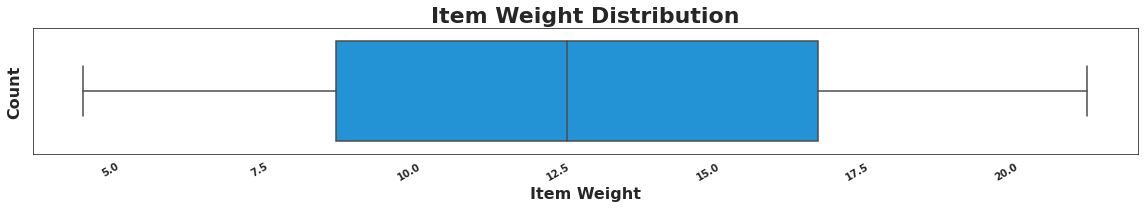

In [183]:
plt.figure(figsize = (16, 3))

sns.boxplot(data=df, x='Item_Weight', color='#069AF3'); 

plt.title('Item Weight Distribution', fontsize = 22, weight='bold')
plt.xlabel('Item Weight', fontsize = 16, weight='bold')
plt.ylabel('Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=30)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

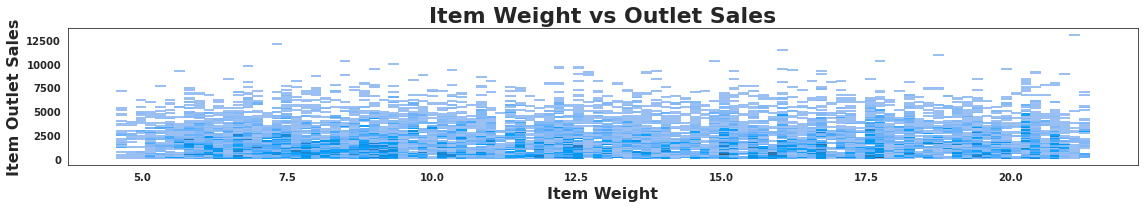

In [184]:
plt.figure(figsize = (16, 3))

sns.histplot(data=df, x='Item_Weight',y='Item_Outlet_Sales', bins=100, color='#069AF3')

plt.title('Item Weight vs Outlet Sales', fontsize = 22, weight='bold')
plt.xlabel('Item Weight', fontsize = 16, weight='bold')
plt.ylabel('Item Outlet Sales', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

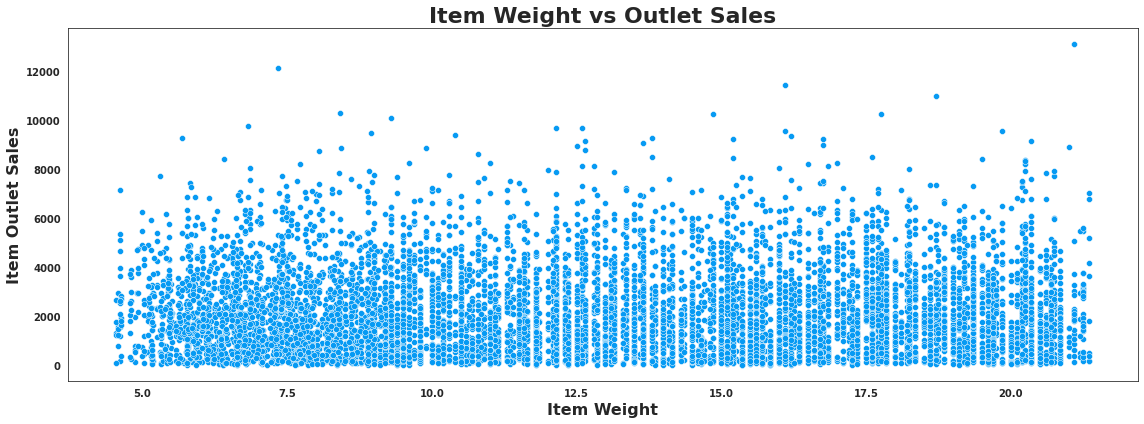

In [185]:
plt.figure(figsize = (16, 6))

sns.scatterplot(data=df, x='Item_Weight', y='Item_Outlet_Sales', color='#069AF3')

plt.title('Item Weight vs Outlet Sales', fontsize = 22, weight='bold')
plt.xlabel('Item Weight', fontsize = 16, weight='bold')
plt.ylabel('Item Outlet Sales', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

#### **Item Visibility**

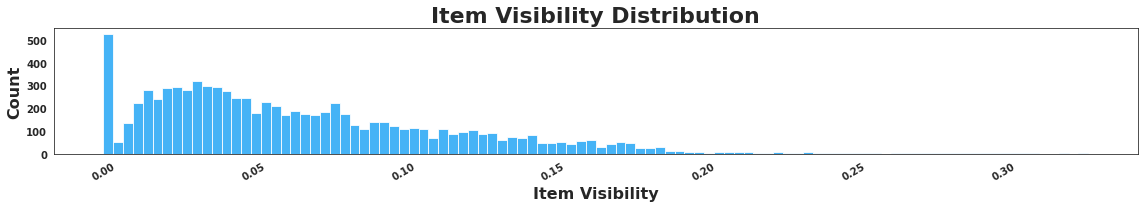

In [186]:
plt.figure(figsize = (16, 3))

sns.histplot(data=df, x='Item_Visibility', color='#069AF3', bins=100); 

plt.title('Item Visibility Distribution', fontsize = 22, weight='bold')
plt.xlabel('Item Visibility', fontsize = 16, weight='bold')
plt.ylabel('Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=30)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

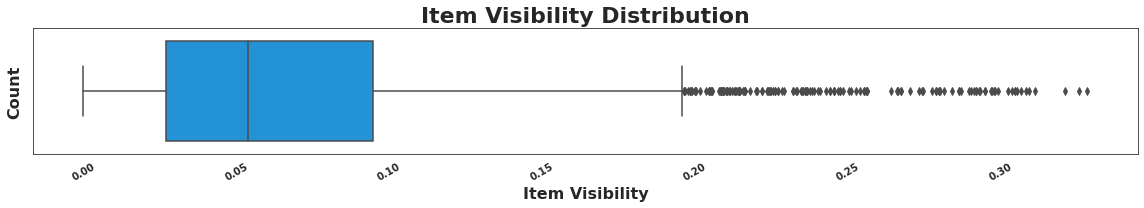

In [187]:
plt.figure(figsize = (16, 3))

sns.boxplot(data=df, x='Item_Visibility', color='#069AF3'); 

plt.title('Item Visibility Distribution', fontsize = 22, weight='bold')
plt.xlabel('Item Visibility', fontsize = 16, weight='bold')
plt.ylabel('Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=30)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

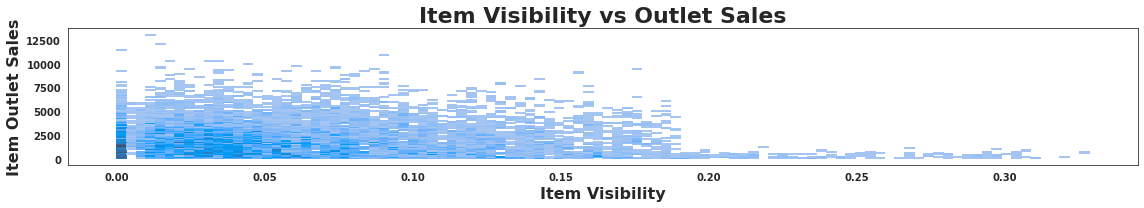

In [188]:
plt.figure(figsize = (16, 3))

sns.histplot(data=df, x='Item_Visibility',y='Item_Outlet_Sales', bins=100, color='#069AF3')

plt.title('Item Visibility vs Outlet Sales', fontsize = 22, weight='bold')
plt.xlabel('Item Visibility', fontsize = 16, weight='bold')
plt.ylabel('Item Outlet Sales', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

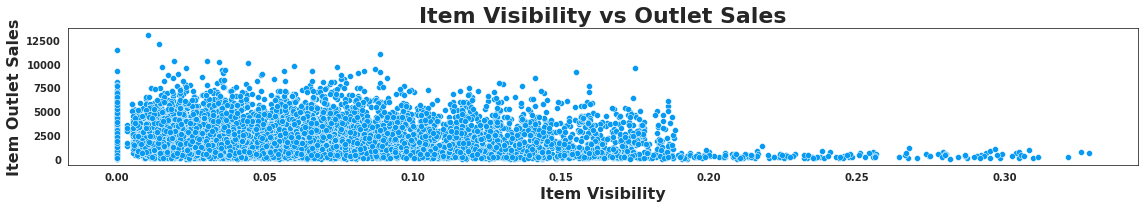

In [189]:
plt.figure(figsize = (16, 3))

sns.scatterplot(data=df, x='Item_Visibility',y='Item_Outlet_Sales', color='#069AF3')

plt.title('Item Visibility vs Outlet Sales', fontsize = 22, weight='bold')
plt.xlabel('Item Visibility', fontsize = 16, weight='bold')
plt.ylabel('Item Outlet Sales', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

#### **Item MRP**

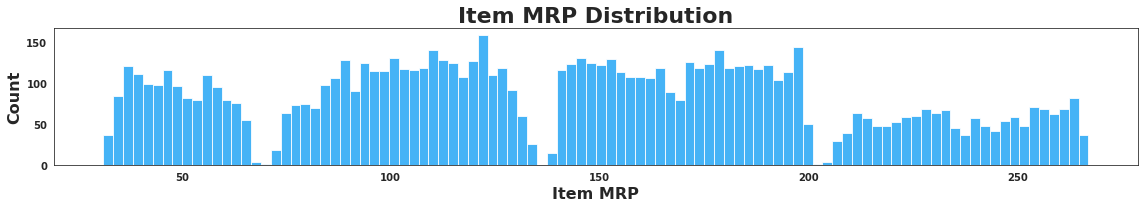

In [190]:
plt.figure(figsize = (16, 3))

sns.histplot(data=df, x='Item_MRP', color='#069AF3', bins=100); 

plt.title('Item MRP Distribution', fontsize = 22, weight='bold')
plt.xlabel('Item MRP', fontsize = 16, weight='bold')
plt.ylabel('Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

plt.tight_layout()
plt.show;

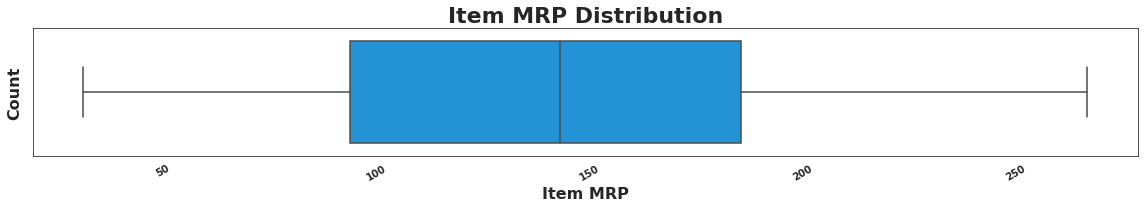

In [191]:
plt.figure(figsize = (16, 3))

sns.boxplot(data=df, x='Item_MRP', color='#069AF3'); 

plt.title('Item MRP Distribution', fontsize = 22, weight='bold')
plt.xlabel('Item MRP', fontsize = 16, weight='bold')
plt.ylabel('Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=30)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

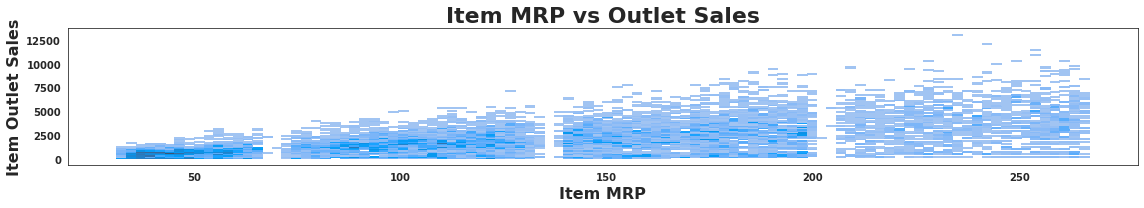

In [192]:
plt.figure(figsize = (16, 3))

sns.histplot(data=df, x='Item_MRP',y='Item_Outlet_Sales', bins=100, color='#069AF3')

plt.title('Item MRP vs Outlet Sales', fontsize = 22, weight='bold')
plt.xlabel('Item MRP', fontsize = 16, weight='bold')
plt.ylabel('Item Outlet Sales', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

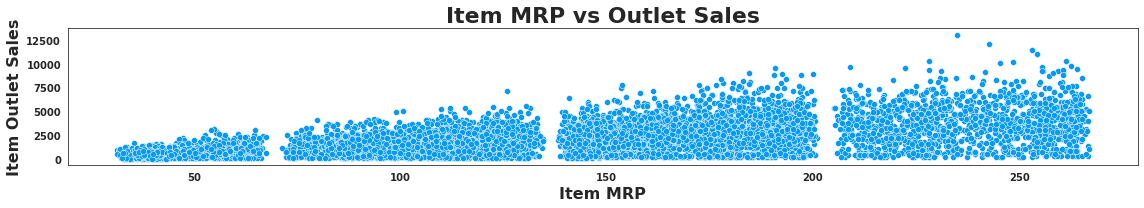

In [193]:
plt.figure(figsize = (16, 3))

sns.scatterplot(data=df, x='Item_MRP',y='Item_Outlet_Sales', color='#069AF3')

plt.title('Item MRP vs Outlet Sales', fontsize = 22, weight='bold')
plt.xlabel('Item MRP', fontsize = 16, weight='bold')
plt.ylabel('Item Outlet Sales', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

### **Categorical Columns**

#### **Item Identifier**

In [194]:
eda_df = df.copy()
top_selling_items_df = eda_df.groupby('Item_Identifier')['Item_Outlet_Sales'].agg(['sum']).sort_values('sum', ascending = False).head(10)
top_selling_items_df['sum'] = round(top_selling_items_df['sum'],3)
top_selling_items_df

,sum
Item_Identifier,
FDY55,42661.801
FDA15,41584.536
FDZ20,40185.025
FDF05,36555.749
FDA04,35741.476
FDK03,34843.977
NCQ06,34680.190
NCQ53,34508.414
FDJ55,33531.020


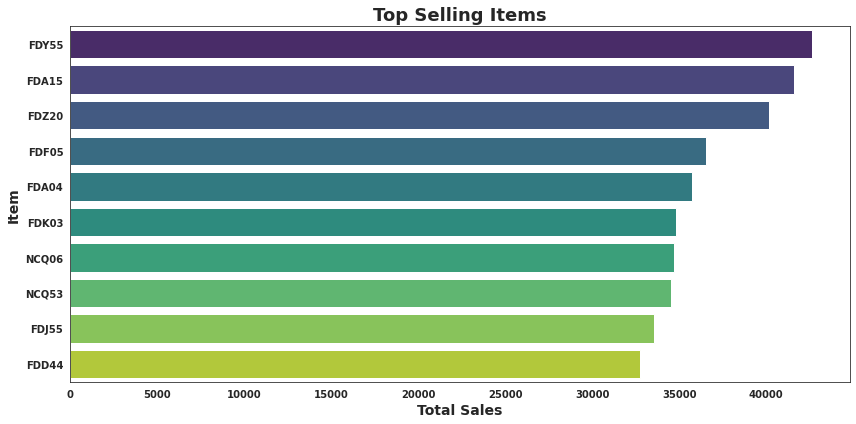

In [195]:
fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(data=top_selling_items_df, x='sum', y=top_selling_items_df.index, orient='h', palette='viridis'); 

plt.title('Top Selling Items', fontsize = 18, weight='bold')
plt.xlabel('Total Sales', fontsize = 14, weight='bold')
plt.ylabel('Item', fontsize = 14, weight='bold');
plt.xticks(fontsize = 10, weight='bold')
plt.yticks(fontsize = 10, weight='bold');


plt.tight_layout()
plt.show;

#ax.xaxis.set_major_formatter('${x:1.0f}')

#### **Item Fat Content**

In [196]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [197]:
df['Item_Fat_Content'].value_counts(normalize=True)

Low Fat    0.647307
Regular    0.352693
Name: Item_Fat_Content, dtype: float64

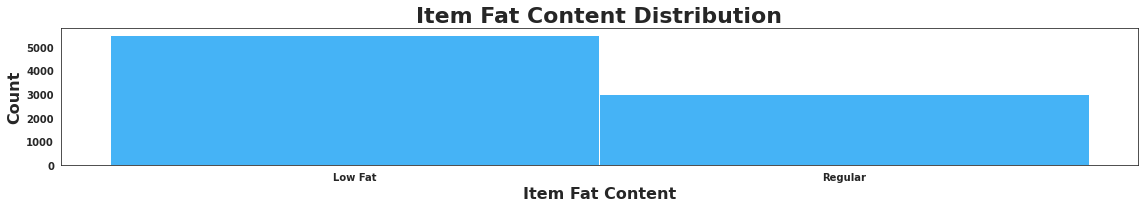

In [198]:
plt.figure(figsize = (16,3))

sns.histplot(data=df, x='Item_Fat_Content', color='#069AF3'); 

plt.title('Item Fat Content Distribution', fontsize = 22, weight='bold');
plt.xlabel('Item Fat Content', fontsize = 16, weight='bold');
plt.ylabel('Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0);
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

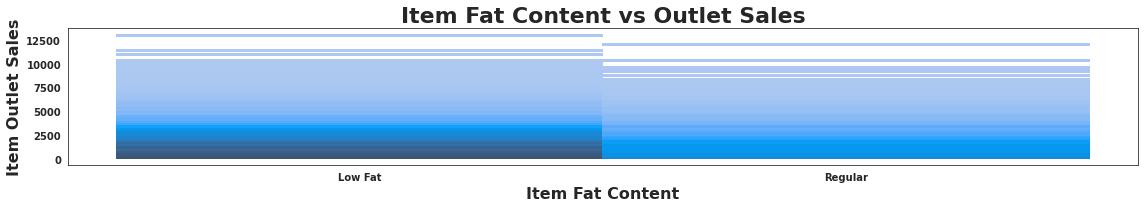

In [199]:
plt.figure(figsize = (16, 3))

sns.histplot(data=df, x='Item_Fat_Content',y='Item_Outlet_Sales', color='#069AF3')

plt.title('Item Fat Content vs Outlet Sales', fontsize = 22, weight='bold')
plt.xlabel('Item Fat Content', fontsize = 16, weight='bold')
plt.ylabel('Item Outlet Sales', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

#### **Outlet Identifier**

In [200]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [201]:
df['Outlet_Identifier'].value_counts(normalize=True)

OUT027    0.109703
OUT013    0.109351
OUT049    0.109117
OUT046    0.109117
OUT035    0.109117
OUT045    0.108999
OUT018    0.108882
OUT017    0.108647
OUT010    0.065118
OUT019    0.061950
Name: Outlet_Identifier, dtype: float64

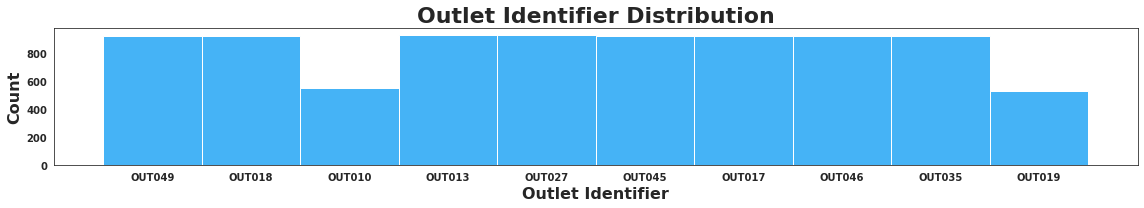

In [202]:
plt.figure(figsize = (16, 3))

sns.histplot(data=df, x='Outlet_Identifier', color='#069AF3'); 

plt.title('Outlet Identifier Distribution', fontsize = 22, weight='bold')
plt.xlabel('Outlet Identifier', fontsize = 16, weight='bold')
plt.ylabel('Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

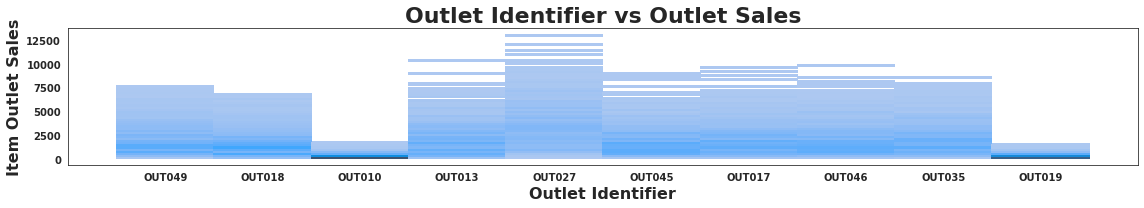

In [203]:
plt.figure(figsize = (16, 3))

sns.histplot(data=df, x='Outlet_Identifier',y='Item_Outlet_Sales', color='#069AF3')

plt.title('Outlet Identifier vs Outlet Sales', fontsize = 22, weight='bold')
plt.xlabel('Outlet Identifier', fontsize = 16, weight='bold')
plt.ylabel('Item Outlet Sales', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

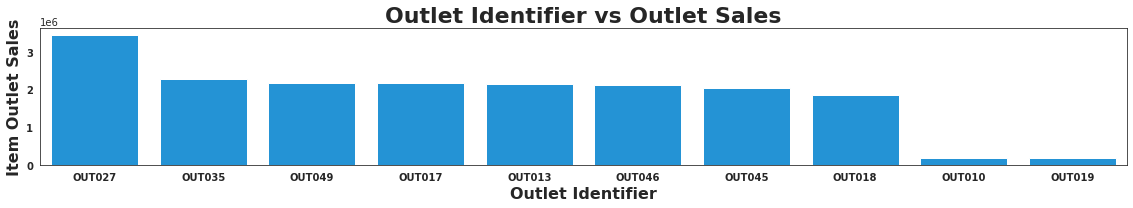

In [204]:
plt.figure(figsize = (16, 3))

ou_df = df.groupby(["Outlet_Identifier"])['Item_Outlet_Sales'].sum().reset_index().sort_values('Item_Outlet_Sales', ascending=False)
sns.barplot(data=ou_df, x='Outlet_Identifier', y='Item_Outlet_Sales', color='#069AF3')

plt.title('Outlet Identifier vs Outlet Sales', fontsize = 22, weight='bold')
plt.xlabel('Outlet Identifier', fontsize = 16, weight='bold')
plt.ylabel('Item Outlet Sales', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

#### **Item Type**

In [205]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [206]:
df['Item_Type'].value_counts(normalize=True)

Fruits and Vegetables    0.144550
Snack Foods              0.140795
Household                0.106770
Frozen Foods             0.100434
Dairy                    0.080019
Canned                   0.076147
Baking Goods             0.076030
Health and Hygiene       0.061011
Soft Drinks              0.052212
Meat                     0.049865
Breads                   0.029450
Hard Drinks              0.025109
Others                   0.019829
Starchy Foods            0.017365
Breakfast                0.012906
Seafood                  0.007509
Name: Item_Type, dtype: float64

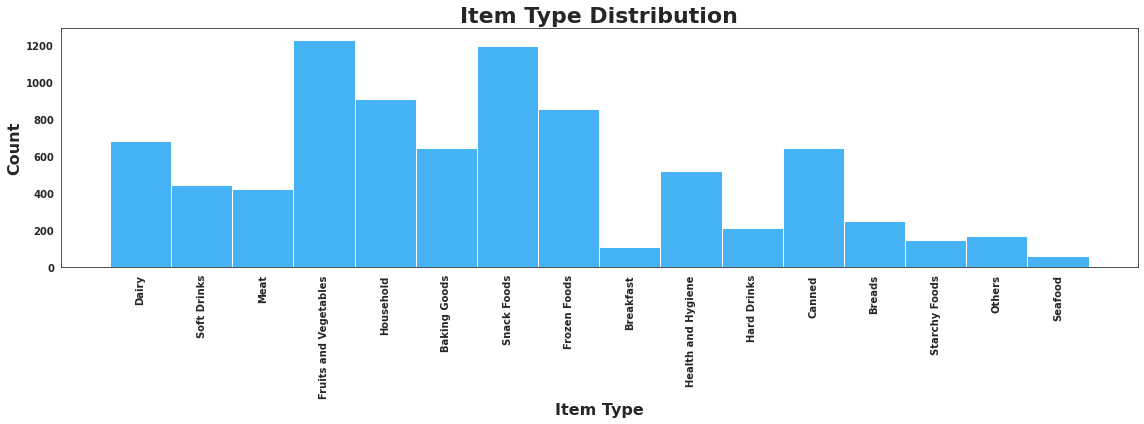

In [207]:
from matplotlib import lines
plt.figure(figsize = (16, 6))

sns.histplot(data=df, x='Item_Type', color='#069AF3'); 

plt.title('Item Type Distribution', fontsize = 22, weight='bold')
plt.xlabel('Item Type', fontsize = 16, weight='bold')
plt.ylabel('Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=90)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

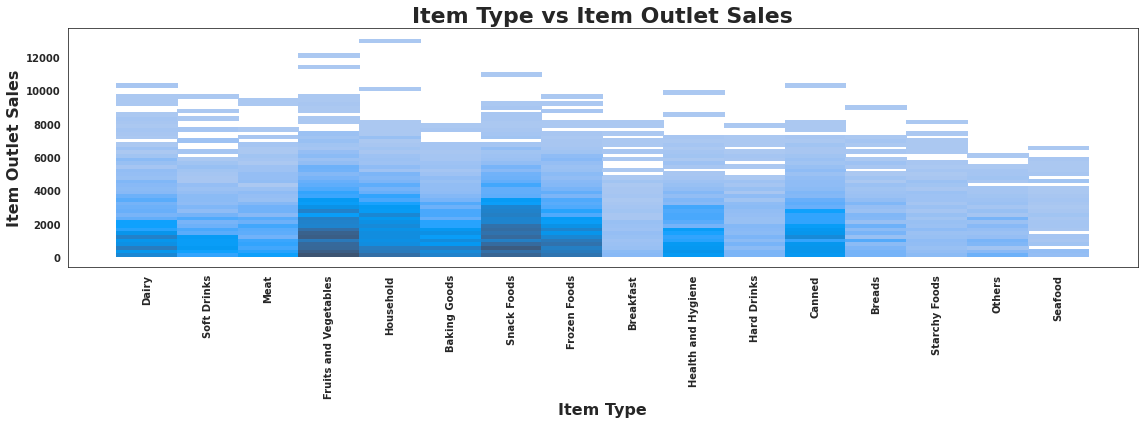

In [208]:
plt.figure(figsize = (16, 6))

sns.histplot(data=df, x='Item_Type', y='Item_Outlet_Sales', color='#069AF3'); 

plt.title('Item Type vs Item Outlet Sales', fontsize = 22, weight='bold')
plt.xlabel('Item Type', fontsize = 16, weight='bold')
plt.ylabel('Item Outlet Sales', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=90)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

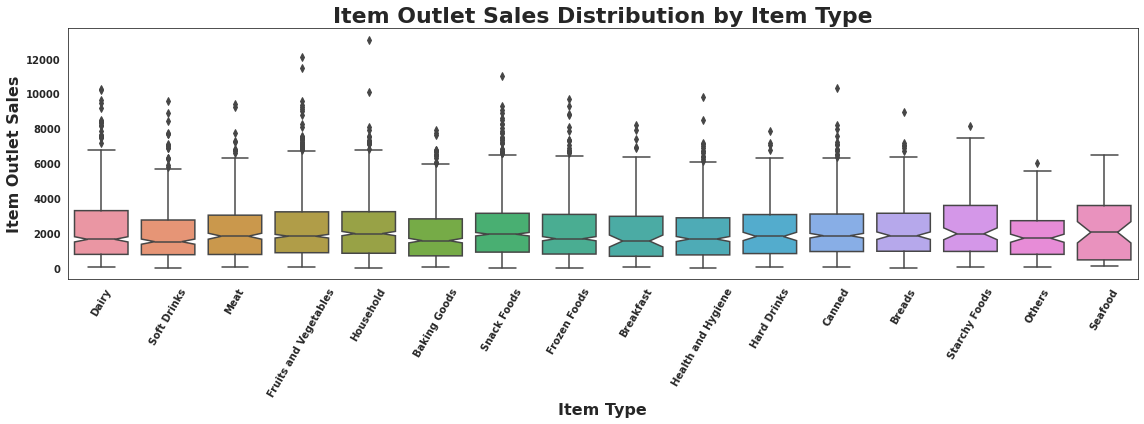

In [209]:
plt.figure(figsize = (16, 6))

sns.boxplot(data=df, x='Item_Type', y='Item_Outlet_Sales', notch=True)

plt.title('Item Outlet Sales Distribution by Item Type', fontsize = 22, weight='bold')
plt.xlabel('Item Type', fontsize = 16, weight='bold')
plt.ylabel('Item Outlet Sales', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=60)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

In [210]:
eda_df = df.copy()
top_selling_item_types_df = eda_df.groupby('Item_Type')['Item_Outlet_Sales'].agg(['sum']).sort_values('sum', ascending = False).head(10)
top_selling_item_types_df['sum'] = round(top_selling_item_types_df['sum'],3)
top_selling_item_types_df

,sum
Item_Type,
Fruits and Vegetables,2820059.817
Snack Foods,2732786.087
Household,2055493.713
Frozen Foods,1825734.789
Dairy,1522594.051
Canned,1444151.493
Baking Goods,1265525.342
Health and Hygiene,1045200.138
Meat,917565.612


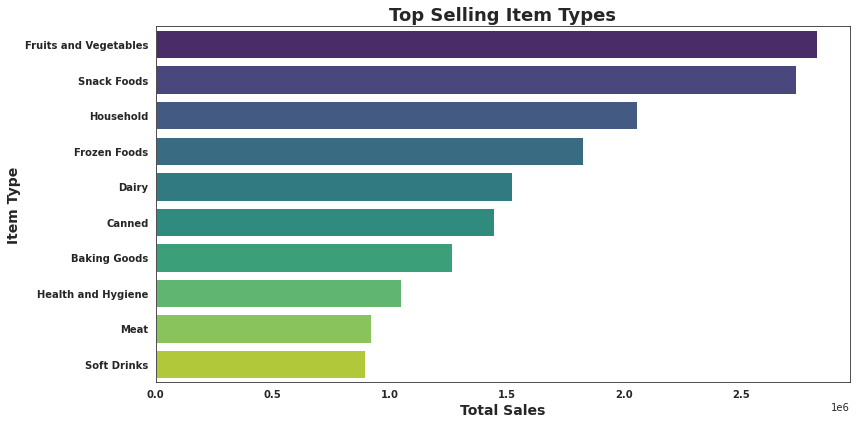

In [211]:
fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(data=top_selling_item_types_df, x='sum', y=top_selling_item_types_df.index, orient='h', palette='viridis'); 

plt.title('Top Selling Item Types', fontsize = 18, weight='bold')
plt.xlabel('Total Sales', fontsize = 14, weight='bold')
plt.ylabel('Item Type', fontsize = 14, weight='bold');
plt.xticks(fontsize = 10, weight='bold')
plt.yticks(fontsize = 10, weight='bold');


plt.tight_layout()
plt.show;

#ax.xaxis.set_major_formatter('${x:1.0f}')

#### **Outlet Establishment Year**

In [212]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [213]:
df['Outlet_Establishment_Year'].value_counts(normalize=True)

1985    0.171653
1987    0.109351
1999    0.109117
1997    0.109117
2004    0.109117
2002    0.108999
2009    0.108882
2007    0.108647
1998    0.065118
Name: Outlet_Establishment_Year, dtype: float64

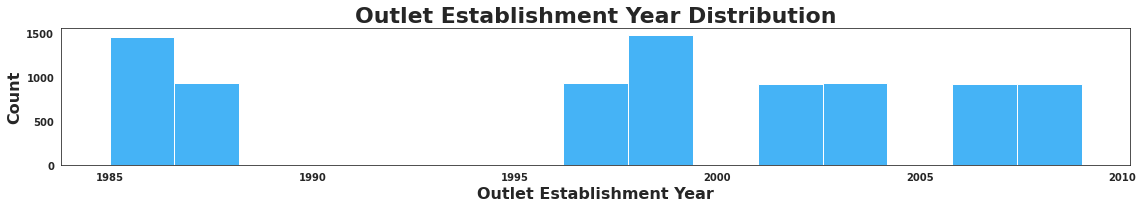

In [214]:
plt.figure(figsize = (16, 3))

sns.histplot(data=df, x='Outlet_Establishment_Year', color='#069AF3'); 

plt.title('Outlet Establishment Year Distribution', fontsize = 22, weight='bold')
plt.xlabel('Outlet Establishment Year', fontsize = 16, weight='bold')
plt.ylabel('Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

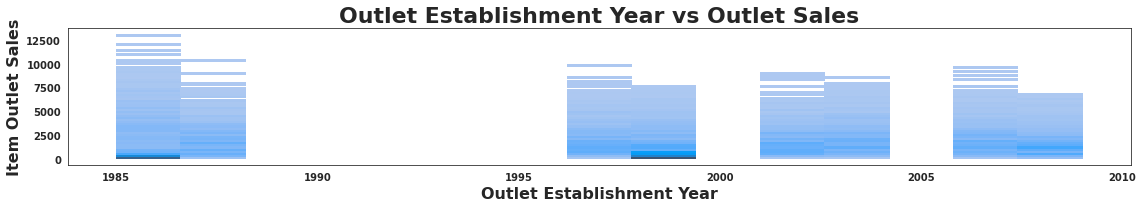

In [215]:
plt.figure(figsize = (16, 3))

sns.histplot(data=df, x='Outlet_Establishment_Year',y='Item_Outlet_Sales', color='#069AF3')

plt.title('Outlet Establishment Year vs Outlet Sales', fontsize = 22, weight='bold')
plt.xlabel('Outlet Establishment Year', fontsize = 16, weight='bold')
plt.ylabel('Item Outlet Sales', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

#### **Outlet Size**

In [216]:
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [217]:
df['Outlet_Size'].value_counts(normalize=True)

Medium     0.327702
Unknown    0.282764
Small      0.280183
High       0.109351
Name: Outlet_Size, dtype: float64

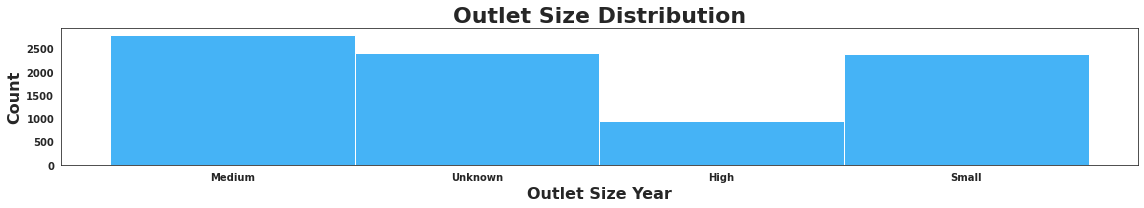

In [218]:
plt.figure(figsize = (16, 3))

sns.histplot(data=df, x='Outlet_Size', color='#069AF3', bins=20); 

plt.title('Outlet Size Distribution', fontsize = 22, weight='bold')
plt.xlabel('Outlet Size Year', fontsize = 16, weight='bold')
plt.ylabel('Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

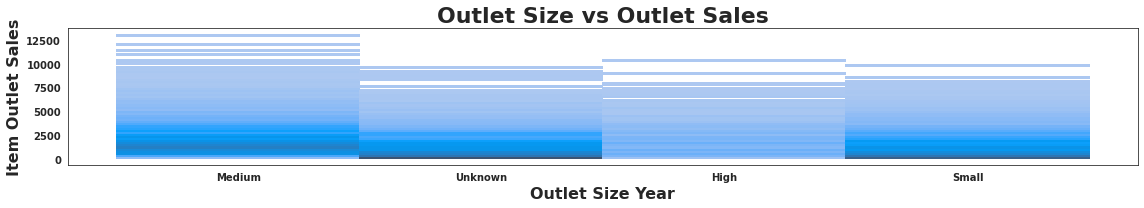

In [219]:
plt.figure(figsize = (16, 3))

sns.histplot(data=df, x='Outlet_Size',y='Item_Outlet_Sales', color='#069AF3')

plt.title('Outlet Size vs Outlet Sales', fontsize = 22, weight='bold')
plt.xlabel('Outlet Size Year', fontsize = 16, weight='bold')
plt.ylabel('Item Outlet Sales', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

In [220]:
eda_df = df.copy()
top_selling_outlet_size_df = eda_df.groupby('Outlet_Size')['Item_Outlet_Sales'].agg(['mean']).sort_values('mean', ascending = False).head(10)
top_selling_outlet_size_df['mean'] = round(top_selling_outlet_size_df['mean'],3)
top_selling_outlet_size_df

,mean
Outlet_Size,
Medium,2681.604
High,2298.995
Small,1912.149
Unknown,1822.627


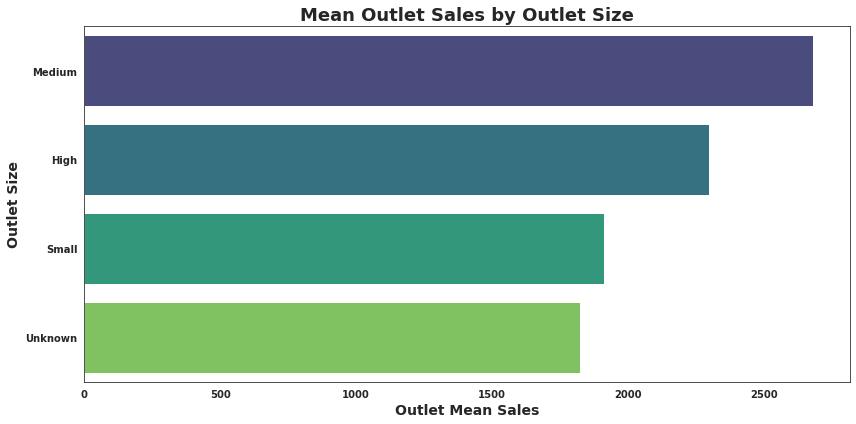

In [221]:
fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(data=top_selling_outlet_size_df, x='mean', y=top_selling_outlet_size_df.index, orient='h', palette='viridis'); 

plt.title('Mean Outlet Sales by Outlet Size', fontsize = 18, weight='bold')
plt.xlabel('Outlet Mean Sales', fontsize = 14, weight='bold')
plt.ylabel('Outlet Size', fontsize = 14, weight='bold');
plt.xticks(fontsize = 10, weight='bold')
plt.yticks(fontsize = 10, weight='bold');


plt.tight_layout()
plt.show;

#ax.xaxis.set_major_formatter('${x:1.0f}')

#### **Outlet Location Type**

In [222]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [223]:
df['Outlet_Location_Type'].value_counts(normalize=True)

Tier 3    0.393054
Tier 2    0.326763
Tier 1    0.280183
Name: Outlet_Location_Type, dtype: float64

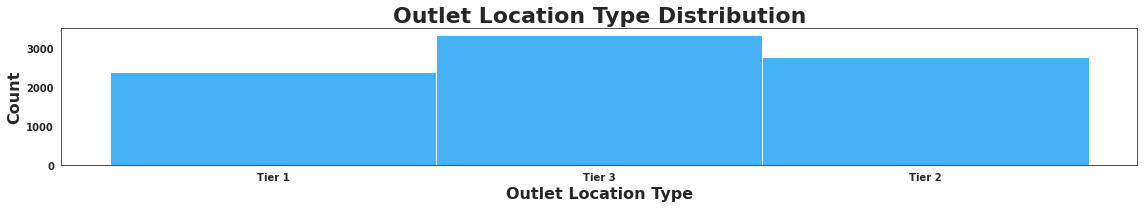

In [224]:
plt.figure(figsize = (16, 3))

sns.histplot(data=df, x='Outlet_Location_Type', color='#069AF3'); 

plt.title('Outlet Location Type Distribution', fontsize = 22, weight='bold')
plt.xlabel('Outlet Location Type', fontsize = 16, weight='bold')
plt.ylabel('Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

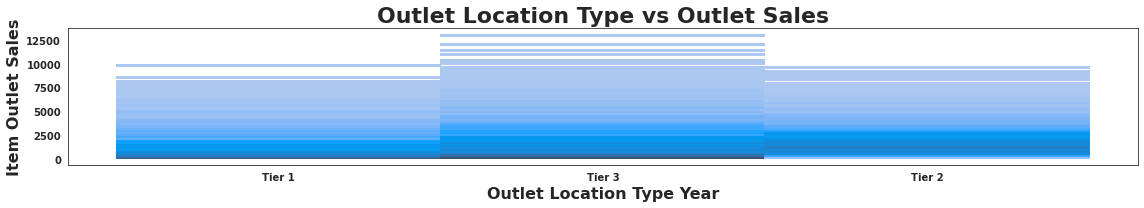

In [225]:
plt.figure(figsize = (16, 3))

sns.histplot(data=df, x='Outlet_Location_Type',y='Item_Outlet_Sales', color='#069AF3')

plt.title('Outlet Location Type vs Outlet Sales', fontsize = 22, weight='bold')
plt.xlabel('Outlet Location Type Year', fontsize = 16, weight='bold')
plt.ylabel('Item Outlet Sales', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

In [226]:
eda_df = df.copy()
top_selling_outlet_location_type_df = eda_df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].agg(['mean']).sort_values('mean', ascending = False).head(10)
top_selling_outlet_location_type_df['mean'] = round(top_selling_outlet_location_type_df['mean'],3)
top_selling_outlet_location_type_df

,mean
Outlet_Location_Type,
Tier 2,2323.991
Tier 3,2279.628
Tier 1,1876.909


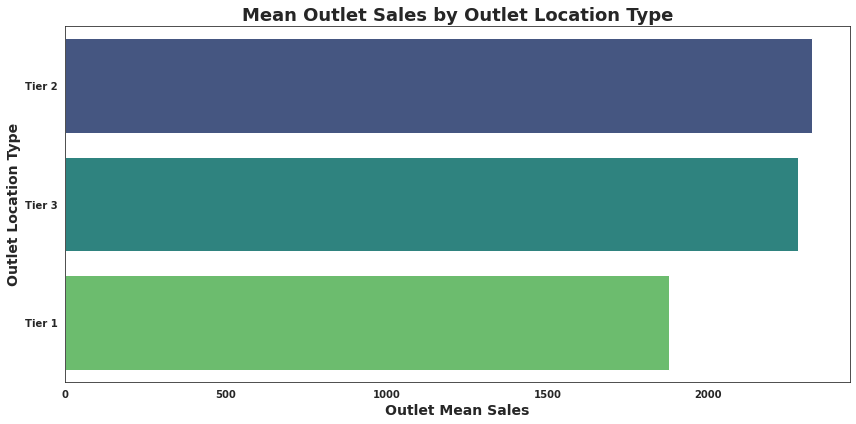

In [227]:
fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(data=top_selling_outlet_location_type_df, x='mean', y=top_selling_outlet_location_type_df.index, orient='h', palette='viridis'); 

plt.title('Mean Outlet Sales by Outlet Location Type', fontsize = 18, weight='bold')
plt.xlabel('Outlet Mean Sales', fontsize = 14, weight='bold')
plt.ylabel('Outlet Location Type', fontsize = 14, weight='bold');
plt.xticks(fontsize = 10, weight='bold')
plt.yticks(fontsize = 10, weight='bold');


plt.tight_layout()
plt.show;

#ax.xaxis.set_major_formatter('${x:1.0f}')

#### **Outlet Type**

In [228]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [229]:
df['Outlet_Type'].value_counts(normalize=True)

Supermarket Type1    0.654347
Grocery Store        0.127068
Supermarket Type3    0.109703
Supermarket Type2    0.108882
Name: Outlet_Type, dtype: float64

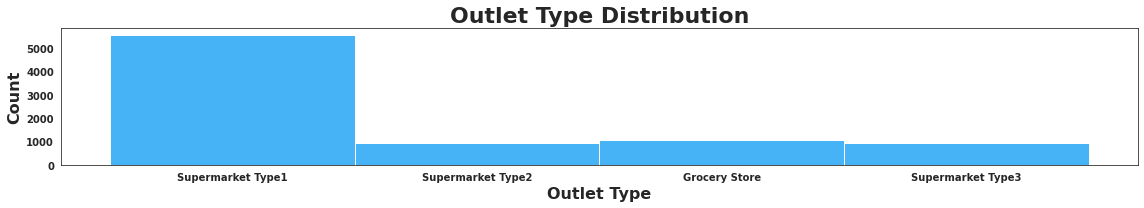

In [230]:
plt.figure(figsize = (16, 3))

sns.histplot(data=df, x='Outlet_Type', color='#069AF3'); 

plt.title('Outlet Type Distribution', fontsize = 22, weight='bold')
plt.xlabel('Outlet Type', fontsize = 16, weight='bold')
plt.ylabel('Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

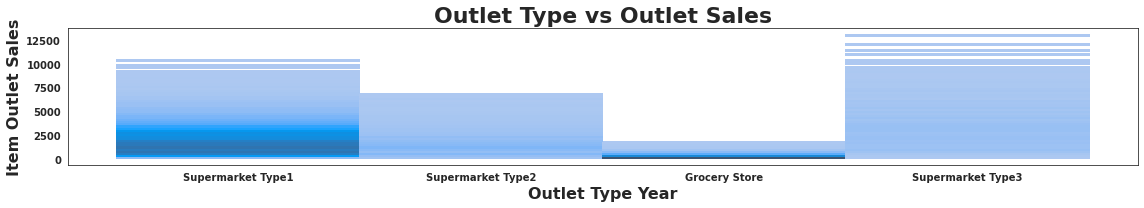

In [231]:
plt.figure(figsize = (16, 3))

sns.histplot(data=df, x='Outlet_Type',y='Item_Outlet_Sales', color='#069AF3')

plt.title('Outlet Type vs Outlet Sales', fontsize = 22, weight='bold')
plt.xlabel('Outlet Type Year', fontsize = 16, weight='bold')
plt.ylabel('Item Outlet Sales', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

In [239]:
eda_df = df.copy()
top_selling_outlet_type_df = eda_df.groupby('Outlet_Type')['Item_Outlet_Sales'].agg(['mean']).sort_values('mean', ascending = False).head(10)
top_selling_outlet_type_df['mean'] = round(top_selling_outlet_type_df['mean'],3)
top_selling_outlet_type_df

,mean
Outlet_Type,
Supermarket Type3,3694.039
Supermarket Type1,2316.181
Supermarket Type2,1995.499
Grocery Store,339.829


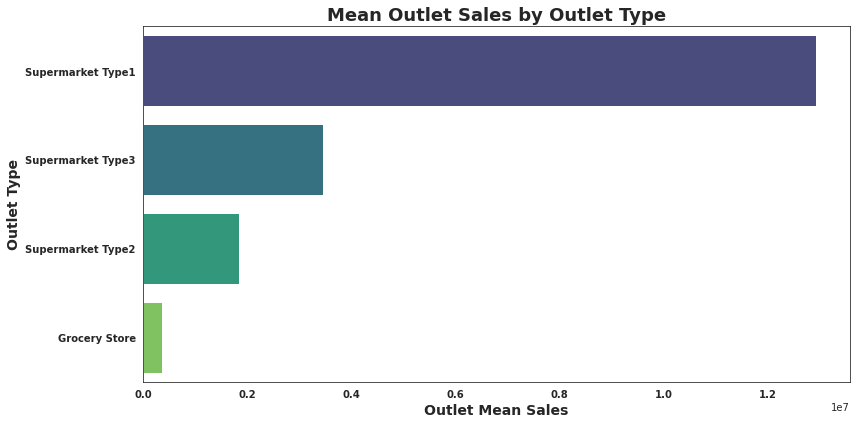

In [237]:
fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(data=top_selling_outlet_type_df, x='mean', y=top_selling_outlet_type_df.index, orient='h', palette='viridis'); 

plt.title('Mean Outlet Sales by Outlet Type', fontsize = 18, weight='bold')
plt.xlabel('Outlet Mean Sales', fontsize = 14, weight='bold')
plt.ylabel('Outlet Type', fontsize = 14, weight='bold');
plt.xticks(fontsize = 10, weight='bold')
plt.yticks(fontsize = 10, weight='bold');


plt.tight_layout()
plt.show;

#ax.xaxis.set_major_formatter('${x:1.0f}')

### **Correlation Heatmap**

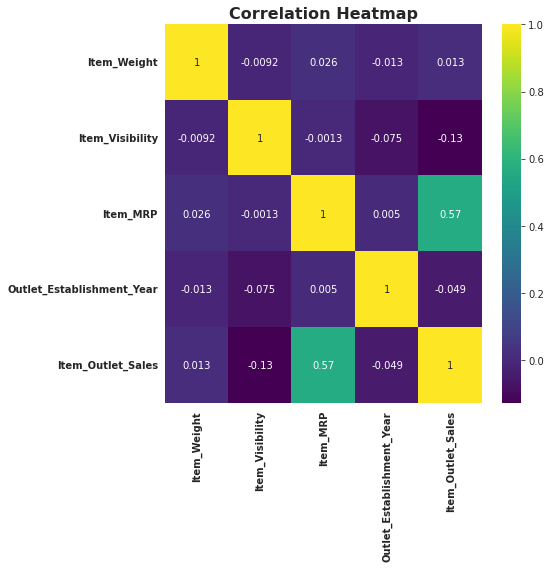

In [234]:
plt.figure(figsize = (8, 8))

corr = df.corr()
sns.heatmap(corr, cmap='viridis', annot=True);

plt.title('Correlation Heatmap', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=90)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

## **Preprocessing for Machine Learning**

### **Identify each feature as ordinal, numerical, nominal, or pass through**

- ordinal features = none
- numeric features = ['Item_Weight', 'Item_Visibility', 'Item_MRP]
- nominal features = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type']
- date/time features = ['Outlet_Establishment_Year']
- pass through = none

In [ ]:
# 'Outlet_Establishment_Year' is a date/time and will be included with categorical features
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype("object")

### **Validation Split**

In [ ]:
# Define features (X) and target (y)
X = df.drop(columns = ['Item_Identifier','Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [ ]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### **Instantiate Column Selectors**

In [ ]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
cat_selector(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP']

### **Instantiate Transformers**

In [ ]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')
# Scaler
scaler = StandardScaler()
# One Hot Encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

### **Instantiate Pipelines**

In [ ]:
# Numeric pipeline
numeric_pipe = make_pipeline(median_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

### **Instantiate ColumnTransformer**

In [ ]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f697869ed10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f697bbf2490>)])

### **Transform Data**

In [ ]:
# Fit on Train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f697869ed10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f697bbf2490>)])

In [ ]:
# Transform Train and Test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

### **Inspect the Result**

In [ ]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 51)




array([[ 0.73649244, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.49912746, -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.12665295,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.00622538, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.59963784, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.73649244, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
X_test_df = pd.DataFrame(X_test_processed)
X_train_df = pd.DataFrame(X_train_processed)

In [ ]:
X_train_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
count,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,...,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00
mean,0.00,-0.00,0.00,0.65,0.35,0.07,0.03,0.01,0.08,0.08,...,0.33,0.28,0.28,0.27,0.33,0.40,0.12,0.65,0.11,0.11
std,1.00,1.00,1.00,0.48,0.48,0.26,0.16,0.11,0.26,0.27,...,0.47,0.45,0.45,0.45,0.47,0.49,0.33,0.48,0.31,0.32
min,-1.81,-1.29,-1.77,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.87,-0.76,-0.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-0.06,-0.23,0.03,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,0.88,0.56,0.72,1.00,1.00,0.00,0.00,0.00,0.00,0.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00
max,1.82,5.13,1.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
X_test_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
count,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,...,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.0
mean,-0.05,0.01,-0.06,0.65,0.35,0.08,0.04,0.01,0.08,0.08,...,0.32,0.28,0.28,0.30,0.32,0.38,0.13,0.66,0.11,0.1
std,1.01,1.04,0.98,0.48,0.48,0.27,0.19,0.11,0.27,0.27,...,0.47,0.45,0.45,0.46,0.47,0.49,0.34,0.47,0.31,0.3
min,-1.80,-1.29,-1.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
25%,-0.97,-0.76,-0.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
50%,-0.09,-0.24,-0.15,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0
75%,0.81,0.56,0.64,1.00,1.00,0.00,0.00,0.00,0.00,0.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.0
max,1.82,4.79,1.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0




---



## **Processing**

#### **Step 1: Import the model**

In [ ]:
from sklearn.linear_model import LinearRegression

#### **Step 2: Make an instance of the Model**

In [ ]:
# Make a linear regression instance
reg = LinearRegression()

#### **Step 3: Train the model on your training data.**

In [ ]:
reg.fit(X_train_processed,y_train)

LinearRegression()

#### **Measuring Model Performance**

**R^2 (Coefficient of Determination)**

The default metric for evaluating a regression model is **R^2, the coefficient of determination**.  The best possible score for R^2 is 1.0, and the higher the R^2 the better.  R^2 is given as a decimal, but is usually interpreted as a percent.  For example, an R^2 of 0.9 can be interpreted as: 90% of the variance in y can be explained by the variance in X.  (90% of the variation in our Target can be explained by the features of our model).

The code to obtain the R^2 data after fitting our model is shown below: 

In [ ]:
train_score = reg.score(X_train_processed, y_train)
print(train_score)

0.5615438029098283


In [ ]:
test_score = reg.score(X_test_processed, y_test)
print(test_score)

0.5671535903394698


#### **Obtaining the predictions**

Extract the actual predictions of the model and save them as a variable. This can be done using .predict() as shown below. This is done separately for both the training data set and the testing data set.

In [ ]:
# To obtain the predictions of the train set
train_preds = reg.predict(X_train_processed)
# To obtain the predictions of the test set
test_preds = reg.predict(X_test_processed)

## **Regression Metrics**

The linear regression section used **R^2** also known as **the coefficient of determination** as a metric to evaluate the performance of the linear regression model.

In [ ]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### **Metric information**

**Coefficient of Determination (r^2):**
- This is the value given when you use model.score(X,y).  Alternately, you can use the sklearn function r2_score() with actual y values and predicted y-values. 

In [ ]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

In [ ]:
print(r2_train)
print(r2_test)

0.5615438029098283
0.5671535903394698


**Mean absolute error (MAE):**
- mean of the absolute value of the errors. You can think of it as the average error.  Sklearn has a function mean_absolute_error() which takes the actual y values and the predicted values:

In [ ]:
mae_train = mean_absolute_error(y_train, train_preds)
mae_test = mean_absolute_error(y_test, test_preds)

In [ ]:
print(mae_train)
print(mae_test)

847.1742107321652
804.0730813702487


**Mean squared error (MSE):**
- mean of the squared errors. MSE "punishes" larger errors, which tends to be useful in the real world. Note that for later in the course when we go over how machine learning algorithms work that MSE is continuous and differentiable, making it easier to use than MAE for optimization.  Sklearn has a function mean_squared_error() which takes the actual y values and the predicted values: 

In [ ]:
mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)

In [ ]:
print(mse_train)
print(mse_test)

1297591.6936635296
1194213.4133620579


**Root mean squared error (RMSE):**
- square root of the mean of the squared errors. Similar to MSE, but more popular as it is seen as easier to understand than MSE.   Once you have calculated MSE, you can just take the square root of it using the np.sqrt()

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

In [ ]:
print(rmse_train)
print(rmse_test)

1139.1188233294758
1092.8007198762534


## **Regression Tree**

### **Decision tree**

#### **Step 1**: Import the model you want to use

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

#### **Step 2**: Make an instance of the Model

In [ ]:
# By leaving the parenthesis empty, we are choosing to use all of the default parameters
# So you get the same results, let's set our random_state to the same number
dec_tree = DecisionTreeRegressor(random_state = 42)

#### **Step 3**: Fit the model using your training data.  The model is learning the relationship between the features (X) and the target (y).

In [ ]:
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

#### **Step 4**: Predict the target values for the training set and the test test.  (Note: You can get the score without this step, but if you want to actually see what the predictions are, this is a helpful step)

In [ ]:
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

#### **Step 5**: Evaluate the Model

In [ ]:
# evaluate the model
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

1.0
0.14196666066199803


The evaluation metric used here is the R^2.  It  should be clear that the default decision tree had a much higher R^2 score on the training data than it did on the test data.  This is an indication that the model is overfit.  

#### **Step 6**: Tune the Model

To explore what can be tuned for a model, it can be very helpful to just run the name of your instantiated model. The output will be all of the parameters you can adjust when you instantiate that type of model.

In [ ]:
# Looking at options for tuning this model
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

As you can see in the output above, there are many options for tuning a decision tree regressor!  Tuning models is something you will get more experience with over time.  For now, lets just look at how we go about tuning one key parameter: the depth of our tree. 

The default value for max_depth is None so the model we ran above was not limited.  Before we start adjusting this parameter, lets check and see what the depth of our default tree was.  

In [ ]:
# What was the depth of our default tree?
dec_tree.get_depth()

44

We see that our tree had a depth of 44.

We can also see how many leaf nodes our tree had.

In [ ]:
# How many leaf nodes?
dec_tree.get_n_leaves()

6277

### **Finding the optimal max_depth (hyperparameter tuning)**

First, lets try a few options to see how changing this parameter affects our model.

In [ ]:
# Let's go extreme and set our max depth to 2
dec_tree_2 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
dec_tree_2.fit(X_train_processed, y_train)
train_2_score = dec_tree_2.score(X_train_processed, y_train)
test_2_score = dec_tree_2.score(X_test_processed, y_test)
print(train_2_score)
print(test_2_score)

0.43164096170474664
0.4337775044707164


As we can see our scores on both the training and test sets are much lower.  This indicates that with a max depth of 2, our model is underfit.

Let's try something in between 2 and 44.  What are the results with a max depth of 30?

In [ ]:
dec_tree_30 = DecisionTreeRegressor(max_depth = 20, random_state = 42)
dec_tree_30.fit(X_train_processed, y_train)
train_30_score = dec_tree_30.score(X_train_processed, y_train)
test_30_score = dec_tree_30.score(X_test_processed, y_test)
print(train_30_score)
print(test_30_score)

0.9339147197432986
0.19132923718414585


In [ ]:
# List of values to try for max_depth:
max_depth_range = list(range(2, 44)) # will try every value between 2 and 36
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

To help us see the results of trying various tree depths, the following code creates a visualization of R2 vs max_depth.

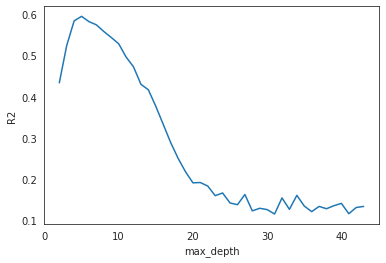

In [ ]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

From the image above, it looks like the best score for the model is when the parameter max_depth is 5.  

In [ ]:
# Let's run the model with our optimized value for max_depth
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train_processed, y_train)
train_5_score = dec_tree_5.score(X_train_processed, y_train)
test_5_score = dec_tree_5.score(X_test_processed, y_test)
print(train_5_score)
print(test_5_score)

0.6039092654846363
0.594954272967407
